## Mercedes-Benz Greener Manufecturing

## Overview

Dataset comprises 4209 records over 377 features of the products and corresponding assembly time of each sample, 
one challenge lie ahead is dimensionality reduction which will significantly reduce the rick of overfitting.
The object is predicting the overall time for vehicles with each of different combination of features to pass testing which is complicated because each model requires a different test stand configuration.
The further goal is developing an automatic test system eliminates the variability inherent in human behavior, is safer than testing by humans, and results in an overall more efficient testing / manufecturing process.

Roadmap:

1. Exploratory Data Analysis
2. Dimentionality reduction 
3. Resampling Data
4. Filtering outliers
5. Train-test split
6. Modeling
7. Statistical Analysis

In [94]:
import sys
import pandas as pd
import numpy as np 
import scipy
import IPython
import sklearn

In [95]:
# Update to python 3.6.5 on Aug 26, 2018

print('python version: {}'.format(sys.version))
print('pandas version: {}'.format(pd.__version__))
print('numpy version: {}'.format(np.__version__))
print('scipy version: {}'.format(scipy.__version__))
print('Ipython version: {}'.format(scipy.__version__))
print('sklearn version: {}'.format(scipy.__version__))

python version: 2.7.15 |Anaconda, Inc.| (default, May  1 2018, 18:37:05) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.23.4
numpy version: 1.15.1
scipy version: 1.1.0
Ipython version: 1.1.0
sklearn version: 1.1.0


In [96]:
import os

os.getcwd()

'/Users/shangluntsai/Projects/public/Mercedes_Greener_Production copy'

In [97]:
fname = os.path.expanduser('~/Projects/public/datasets/mercedes/train.csv')
funseen = os.path.expanduser('~/Projects/public/datasets/mercedes/test.csv')

In [98]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [99]:
df = pd.read_csv(fname) 
dfv = pd.read_csv(funseen)

## Exploratory Data Analysis

In [100]:
df.head(10)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
5,18,92.93,t,b,e,c,d,g,h,s,...,0,0,1,0,0,0,0,0,0,0
6,24,128.76,al,r,e,f,d,f,h,s,...,0,0,0,0,0,0,0,0,0,0
7,25,91.91,o,l,as,f,d,f,j,a,...,0,0,0,0,0,0,0,0,0,0
8,27,108.67,w,s,as,e,d,f,i,h,...,1,0,0,0,0,0,0,0,0,0
9,30,126.99,j,b,aq,c,d,f,a,e,...,0,0,1,0,0,0,0,0,0,0


In [101]:
dfv.head(10)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0
5,8,y,aa,ai,e,d,x,g,s,0,...,1,0,0,0,0,0,0,0,0,0
6,10,x,b,ae,d,d,x,d,y,0,...,0,0,0,0,0,1,0,0,0,0
7,11,f,s,ae,c,d,h,d,a,0,...,0,0,1,0,0,0,0,0,0,0
8,12,ap,l,s,c,d,h,j,n,0,...,0,0,0,0,0,0,0,0,0,0
9,14,o,v,as,f,d,g,f,v,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [103]:
dfv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [104]:
df.columns.difference(dfv.columns)

Index([u'y'], dtype='object')

### Distribution of values in integer columns 

In [105]:
from matplotlib import pyplot as plt
import seaborn as sns 

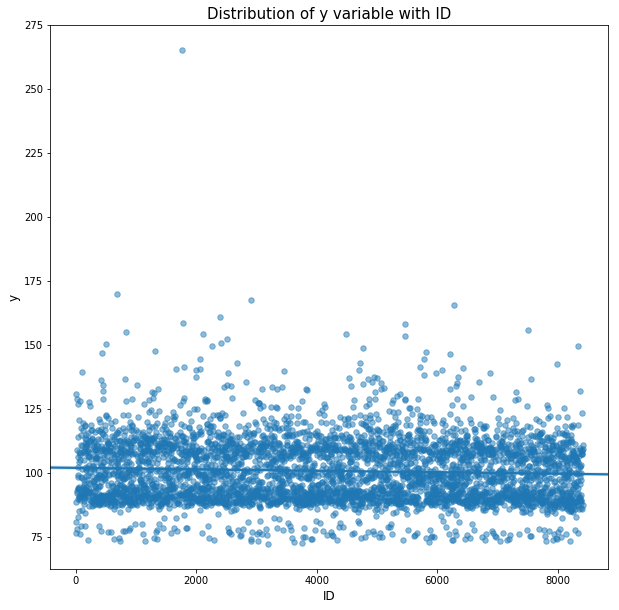

In [106]:
var_name = "ID"
plt.figure(figsize=(10,10))
sns.regplot(x=var_name, y='y', data=df, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+ var_name, fontsize=15)
plt.show()

#plt.clf()

### Analyze the distribution of 'y' column

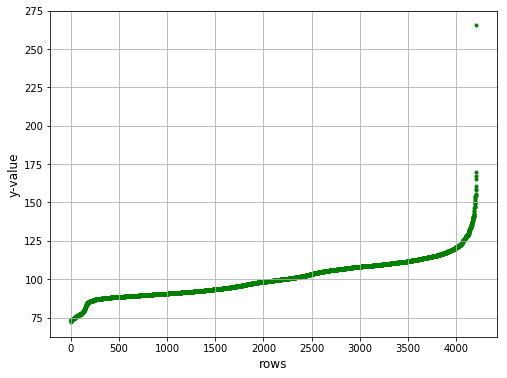

In [107]:
# Plotting y distribution over rows

plt.figure(figsize=(8,6))
plt.scatter(range(df.shape[0]), np.sort(df.y.values), marker = '.', c = 'g')
plt.xlabel('rows', fontsize=12)
plt.ylabel('y-value', fontsize=12)
plt.xticks(np.arange(0, int(df.shape[0]), step=500.0))
plt.grid()
plt.show()


In [108]:
df['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

In [109]:
typedf = df.dtypes.reset_index()
typedf.columns = ['Count', 'Data Type']
typedf.groupby('Data Type').aggregate('count').reset_index()

,Data Type,Count
0,int64,369
1,float64,1
2,object,8


In [110]:
# Get column names group by dtypes
# 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8' - these columns are object type

g = df.columns.groupby(df.dtypes)
g

{dtype('int64'): Index([u'ID', u'X10', u'X11', u'X12', u'X13', u'X14', u'X15', u'X16', u'X17',
        u'X18',
        ...
        u'X375', u'X376', u'X377', u'X378', u'X379', u'X380', u'X382', u'X383',
        u'X384', u'X385'],
       dtype='object', length=369),
 dtype('float64'): Index([u'y'], dtype='object'),
 dtype('O'): Index([u'X0', u'X1', u'X2', u'X3', u'X4', u'X5', u'X6', u'X8'], dtype='object')}

## Data Munging

In [112]:
# Categorical Columns
cat_cols = []
for c in train_set.columns:
    if train_set[c].dtype == 'object':
        cat_cols.append(c)
print('Categorical columns:', cat_cols)


# Dublicate Columns
d = {}; done = []
cols = train_set.columns.values
for c in cols: d[c]=[]
for i in range(len(cols)):
    if i not in done:
        for j in range(i+1, len(cols)):
            if all(train_set[cols[i]] == train_set[cols[j]]):
                done.append(j)
                d[cols[i]].append(cols[j])
dub_cols = []
for k in d.keys():
    if len(d[k]) > 0: 
        # print k, d[k]
        dub_cols += d[k]        
print('Dublicates columns:', dub_cols)

# Constant columns
const_cols = []
for c in cols:
    if len(train_set[c].unique()) == 1:
        const_cols.append(c)
print('Constant cols:', const_cols)

Categorical columns: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
Dublicates columns: ['X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347', 'X382', 'X232', 'X279', 'X35', 'X37', 'X39', 'X302', 'X113', 'X134', 'X147', 'X222', 'X102', 'X214', 'X239', 'X76', 'X324', 'X248', 'X253', 'X385', 'X172', 'X216', 'X213', 'X84', 'X244', 'X122', 'X243', 'X320', 'X245', 'X94', 'X242', 'X199', 'X119', 'X227', 'X146', 'X226', 'X326', 'X360', 'X262', 'X266', 'X247', 'X254', 'X364', 'X365', 'X296', 'X299']
Constant cols: ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


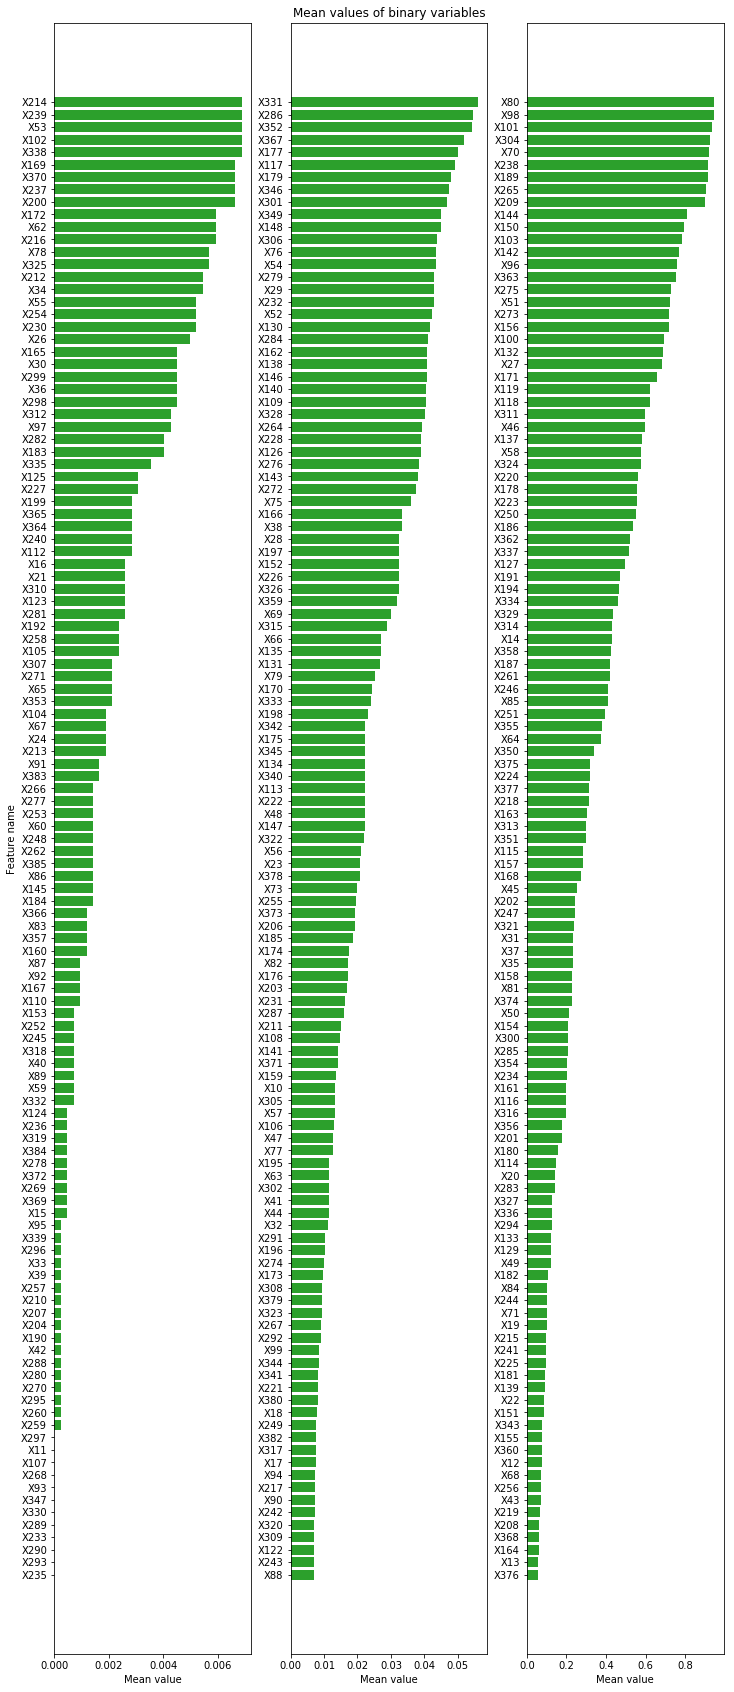

In [91]:
pal = sns.color_palette()
cat_col = list(train_set.columns[10:378])

binary_means = [np.mean(train_set[c]) for c in cat_col]
binary_names = np.array(cat_col)[np.argsort(binary_means)]
binary_means = np.sort(binary_means)

fig, ax = plt.subplots(1, 3, figsize=(12,30))
ax[0].set_ylabel('Feature name')
ax[1].set_title('Mean values of binary variables')
for i in range(3):
    names, means = binary_names[i*119:(i+1)*119], binary_means[i*119:(i+1)*119]
    ax[i].barh(range(len(means)), means, color=pal[2])
    ax[i].set_xlabel('Mean value')
    ax[i].set_yticks(range(len(means)))
    ax[i].set_yticklabels(names, rotation='horizontal')
plt.show()

In [113]:
# Encoding categorical columus

for col in cat_cols:
        le = preprocessing.LabelEncoder()
        le.fit(list(train_set[col].values) + list(test_set[col].values))
        train_set[col] = le.transform(list(train_set[col].values)).copy()
        test_set[col] = le.transform(list(test_set[col].values)).copy()


In [114]:
train_set.shape

(4209, 378)

### Checking data types in training data

In [106]:
type_df = train.dtypes.reset_index()
type_df.columns = ["Count", "Column Type"]
type_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


In [115]:
test_set.shape

(4209, 377)

### Dimensionality reduction

In [116]:
# Thanks to code from Kaggle user remidi
# at https://www.kaggle.com/remidi/dimensionality-reduction-techniques

from sklearn.decomposition import TruncatedSVD, FastICA, PCA  
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection

n_comp = 20

# Truncated SVD
tsvd = TruncatedSVD(n_components=n_comp, random_state=20)
tsvd_train = tsvd.fit_transform(train_set.drop(["y"], axis=1))
tsvd_test = tsvd.transform(test_set)

# PCA
pca = PCA(n_components=n_comp, random_state=20)
pca_train = pca.fit_transform(train_set.drop(["y"], axis=1))
pca_test = pca.transform(test_set)

# ICA - inceased tol to 0.05 to avoid warning of not-converge
ica = FastICA(n_components=n_comp, random_state=20, tol=0.05)   
ica_train = ica.fit_transform(train_set.drop(["y"], axis=1))
ica_test = ica.transform(test_set)

# GRP
grp = GaussianRandomProjection(n_components=n_comp, eps=0.1, random_state=20)
grp_train = grp.fit_transform(train_set.drop(["y"], axis=1))
grp_test = grp.transform(test_set)

# SRP
srp = SparseRandomProjection(n_components=n_comp, dense_output=True, random_state=20)
srp_train = srp.fit_transform(train_set.drop(["y"], axis=1))
srp_test = srp.transform(test_set)

In [117]:
work_columns = list(set(train_set.columns) - set(['y']))

for i in range(1, n_comp + 1):
    train_set['pca_' + str(i)] = pca_train[:, i - 1].copy()
    test_set['pca_' + str(i)] = pca_test[:, i - 1].copy()

    train_set['ica_' + str(i)] = ica_train[:, i - 1].copy()
    test_set['ica_' + str(i)] = ica_test[:, i - 1].copy()

    train_set['tsvd_' + str(i)] = tsvd_train[:, i - 1].copy()
    test_set['tsvd_' + str(i)] = tsvd_test[:, i - 1].copy()

    train_set['grp_' + str(i)] = grp_train[:, i - 1].copy()
    test_set['grp_' + str(i)] = grp_test[:, i - 1].copy()

    train_set['srp_' + str(i)] = srp_train[:, i - 1].copy()
    test_set['srp_' + str(i)] = srp_test[:, i - 1].copy()

### Train-test split

In [118]:
from sklearn.model_selection import train_test_split

y_train_val = train_set['y'].values
X_train, X_test, y_train, y_test = train_test_split(train_set, y_train_val, train_size=0.8, test_size=0.2)



In [120]:
train_set.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,pca_19,ica_19,tsvd_19,grp_19,srp_19,pca_20,ica_20,tsvd_20,grp_20,srp_20
0,0,130.81,37,23,20,0,3,27,9,14,...,0.763655,0.014391,0.415046,5.262936,0.000000,-0.831457,0.004468,-0.246498,8.187317,1.970608
1,6,88.53,37,21,22,4,3,31,11,14,...,0.100401,-0.004319,0.112566,3.245488,0.985304,1.219859,0.007554,-0.484294,10.670732,0.985304
2,7,76.26,24,24,38,2,3,30,9,23,...,-1.257607,0.003388,-1.199236,3.374388,2.955913,-0.589357,0.008956,0.644716,5.907065,0.985304
3,9,80.62,24,21,38,5,3,30,11,4,...,-0.473153,-0.006944,-0.549774,-5.617152,4.926521,0.172082,0.007342,-0.146137,11.777684,0.985304
4,13,78.02,24,23,38,5,3,14,3,13,...,-0.438686,0.017242,-0.811610,-5.288744,2.955913,0.387306,-0.014186,-0.695457,10.404363,0.985304


In [121]:
test_set.shape

(4209, 477)

### Modelling: Random Forest Regressor model

In [122]:
from sklearn.ensemble import RandomForestRegressor

rfgr = RandomForestRegressor(n_estimators=200, 
                             max_depth=10,
                             max_leaf_nodes=60,
                             min_samples_leaf=4, 
                             max_features=0.2, 
                             n_jobs=-1, 
                             random_state=50,
                             oob_score=True, 
                            )
rfgr

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=0.2, max_leaf_nodes=60, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=-1, oob_score=True, random_state=50,
           verbose=0, warm_start=False)

In [123]:
rfgr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=0.2, max_leaf_nodes=60, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=-1, oob_score=True, random_state=50,
           verbose=0, warm_start=False)

In [125]:
y0_pred = rfgr.predict(X_test)
y0_pred

array([ 92.12965992, 111.64463647,  90.94595133, 118.1751591 ,
        91.50876167,  90.80399903,  90.28522932, 112.27344015,
       124.36913746, 109.08184894,  91.3171964 ,  90.7295584 ,
        94.70435007, 104.97170924, 100.59690745, 111.90893623,
        91.19653261,  93.46360592, 109.40132381, 128.36069688,
       114.32216718, 109.48414866, 108.71042802, 114.18323451,
       108.40008332, 111.33591593,  95.23417812,  94.45044098,
        91.24513404, 111.87294369,  93.93054579, 113.97796362,
        91.44074042, 109.69485089, 112.22375246,  91.53429847,
        90.97648067,  90.09763648,  78.64222542,  91.29113378,
        93.8835321 ,  90.56999701, 109.99130827,  91.37883245,
       110.74761506,  93.11027235,  91.32847694,  90.83093612,
        90.64597416, 105.44979035, 111.06302628,  91.08656273,
        90.94417188,  96.7974073 , 110.19971747, 112.82943919,
        92.70692386, 100.09722424,  92.78334839, 101.97362049,
        99.45959703,  95.11813243,  91.47949224,  94.49

#### Model Evaluation

In [126]:
def model_eval(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy: {:0.2f}%.'.format(accuracy))
    
    return accuracy


base_accuracy = model_eval(rfgr, X_test, y_test)


Model Performance
Average Error: 2.1558 degrees.
Accuracy: 97.90%.


### Modelling: Gredient Boosting Regressor

In [127]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, 
                                random_state=50,
                                max_features = "auto", 
                                min_samples_leaf = 50,
                                verbose=5)

In [128]:
gbr.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1         125.7730            7.30s
         2         102.8618            7.28s
         3          84.1402            7.18s
         4          68.8636            7.07s
         5          56.4558            6.95s
         6          46.2629            6.86s
         7          37.9725            6.82s
         8          31.2502            6.70s
         9          25.7123            6.61s
        10          21.1970            6.51s
        11          17.5158            6.41s
        12          14.5132            6.34s
        13          12.0716            6.27s
        14          10.0766            6.21s
        15           8.4547            6.12s
        16           7.1252            6.04s
        17           6.0269            5.96s
        18           5.1369            5.88s
        19           4.4070            5.81s
        20           3.8120            5.74s
        21           3.3248            5.68s
        2

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=50, subsample=1.0, verbose=5,
             warm_start=False)

In [130]:
y1_pred = gbr.predict(X_test)
y1_pred

array([ 92.25087008, 114.5701143 ,  87.86489159, 129.02808895,
        91.29394556,  88.24829786,  90.79443905, 113.03630027,
       122.54103834, 108.32161245,  86.89786108,  86.58518135,
        97.66526167, 103.14691351,  99.86670573, 111.66710435,
        89.83940301,  92.93124511, 108.93343869, 132.56442871,
       116.69924935, 107.78041314, 110.04434061, 117.54979202,
       104.97267246, 109.48608217,  98.24854694,  97.24555138,
        91.17472615, 111.96196565,  94.39694582, 116.36324297,
        90.35503191, 106.59199702, 112.20434998,  90.79711213,
        90.60366525,  87.98804789,  79.81131993,  91.61408055,
        95.6186533 ,  88.4478418 , 108.57982363,  90.11694166,
       111.16333763,  94.08543732,  86.90913182,  89.52590243,
        88.69660672, 105.32040553, 111.16304719,  89.40441881,
        89.40174572, 101.0900561 , 110.89707322, 113.83220549,
        93.54845699,  99.02307554,  90.02267472, 102.58719548,
        93.68620085,  94.60092616,  90.35935017,  96.73

#### Model Evaluation

In [131]:
gbr_accuracy = model_eval(gbr, X_test, y_test)

Model Performance
Average Error: 0.2036 degrees.
Accuracy: 99.82%.


### Modelling: AdaBoost Regressor

In [132]:
from sklearn.ensemble import AdaBoostRegressor

adr = AdaBoostRegressor(learning_rate=0.1, 
                        loss='square', 
                        n_estimators=100)


In [133]:
adr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='square',
         n_estimators=100, random_state=None)

In [135]:
y2_pred = adr.predict(X_test)
y2_pred

array([ 89.9993768 , 112.74574614,  89.84883319, 127.6027957 ,
        89.98816667,  89.90529644,  89.98816667, 112.09574225,
       121.61166667, 108.57169867,  89.64697653,  89.40619507,
        98.05528139, 102.96276978, 100.27547993, 111.05287966,
        89.98816667,  91.00733898, 109.84881075, 132.93606452,
       115.20807963, 108.41090468, 110.16631638, 116.0257243 ,
       105.00672326, 110.00267372,  98.51025463,  96.8642145 ,
        89.98816667, 111.26089342,  92.69248477, 114.56669065,
        89.98816667, 107.74936291, 111.26089342,  89.98816667,
        89.98816667,  89.8591054 ,  77.08272   ,  89.98816667,
        94.41697115,  89.93660819, 109.43975241,  89.98816667,
       111.05287966,  92.42688652,  89.64697653,  89.98816667,
        89.93660819, 106.9862446 , 111.05287966,  89.93660819,
        89.93660819, 100.64363057, 110.9462375 , 112.26815021,
        91.79364   ,  99.73867675,  89.98816667, 101.43519931,
        92.07110236,  93.20845977,  89.98816667,  95.19

#### Model Evaluation

In [136]:
adr_accuracy = model_eval(adr, X_test, y_test)

Model Performance
Average Error: 1.1209 degrees.
Accuracy: 98.84%.


### Modelling: Bagging Regressor

In [137]:
from sklearn.ensemble import BaggingRegressor

bgr = BaggingRegressor(n_jobs=-1,
                       n_estimators=200,
                       max_samples=100,
                       bootstrap=True,
                       random_state=50,
                       oob_score=True)

In [138]:
bgr.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=100,
         n_estimators=200, n_jobs=-1, oob_score=True, random_state=50,
         verbose=0, warm_start=False)

In [139]:
y3_pred = bgr.predict(X_test)
y3_pred

array([ 92.18855, 114.7903 ,  87.5858 , 129.3099 ,  91.36045,  88.18965,
        90.7593 , 113.93565, 123.02065, 108.3803 ,  86.88075,  86.5398 ,
        97.4731 , 103.0567 ,  99.76765, 112.01015,  89.94685,  92.89975,
       108.9556 , 130.11415, 117.02255, 107.73215, 110.2919 , 117.94785,
       104.87655, 109.8163 ,  98.2397 ,  97.1841 ,  91.03175, 112.3822 ,
        94.5238 , 116.43785,  90.19295, 106.8909 , 112.3387 ,  90.80655,
        90.4748 ,  87.72665,  77.9294 ,  91.45455,  95.6345 ,  88.3695 ,
       108.65885,  90.0356 , 111.3617 ,  93.75215,  87.28745,  89.47735,
        88.6346 , 105.25695, 111.6086 ,  89.46145,  89.3772 , 100.83485,
       110.8693 , 114.27365,  93.4799 ,  99.2328 ,  89.8776 , 102.29055,
        94.06955,  94.76625,  90.33725,  96.8962 ,  86.44995,  77.9823 ,
        98.8949 ,  89.2054 ,  87.2042 ,  87.2079 , 111.78885, 105.83255,
        96.36455, 103.0653 ,  98.1133 ,  87.2608 ,  92.6701 ,  77.63395,
        96.87615, 115.5128 , 111.205  , 123.50485, 

#### Model Evaluation

In [140]:
bgr_accuracy = model_eval(bgr, X_test, y_test)

Model Performance
Average Error: 0.4617 degrees.
Accuracy: 99.57%.
